In [4]:
#MOCKUPS FOR DATA 0.DPT (100% TiO2)

import pandas as pd
import numpy as np

# Read the .dpt file into a DataFrame
file_path = 'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/0.dpt'
measured_data = pd.read_csv(file_path, delimiter=',', header=None, names=['wavelength', 'intensity'])

# Calculate mean and standard deviation
mean = measured_data.mean()
std_dev = measured_data.std()

# Number of mockup sets to create
num_mockup_sets = 5
intensity_column = 'intensity'
mockup_data_sets = []

for i in range(num_mockup_sets):
    mockup_data = measured_data.copy()
    if intensity_column in measured_data.columns:
        noise = np.random.normal(0, measured_data[intensity_column].std() * 0.009, size=len(measured_data))
        mockup_data[intensity_column] = measured_data[intensity_column] + noise
    mockup_data_sets.append(mockup_data)

# Displaying one of the mockup data sets for verification
mockup_data_sets[0].head()


# Save mockup data sets to CSV files
mockup_csv_paths = []
for i, mockup_data in enumerate(mockup_data_sets):
    file_path = f'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/mock_{i+1}.csv'
    mockup_data.to_csv(file_path, index=False)
    mockup_csv_paths.append(file_path)

mockup_csv_paths



['C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/mock_1.csv',
 'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/mock_2.csv',
 'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/mock_3.csv',
 'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/mock_4.csv',
 'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment/mock_5.csv']

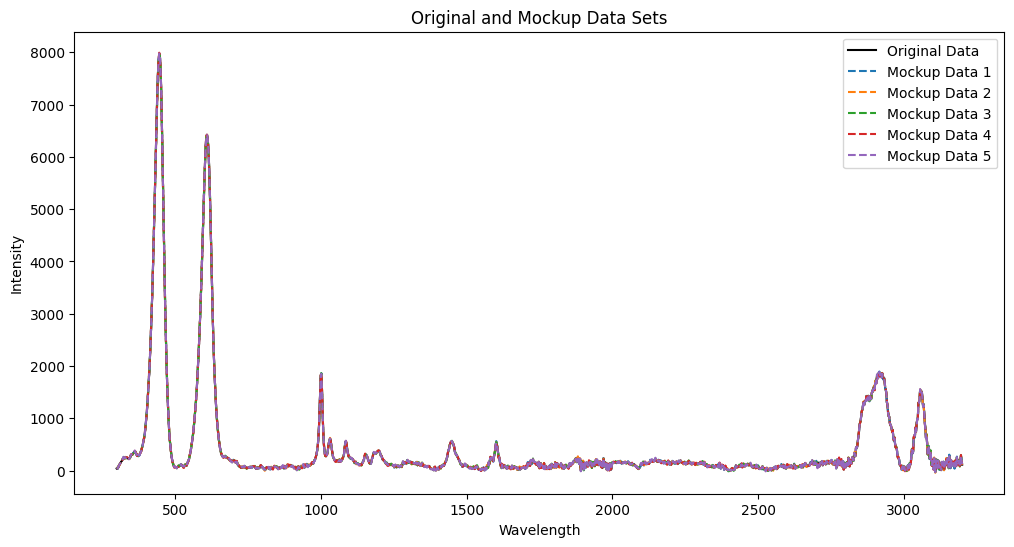

In [5]:
import matplotlib.pyplot as plt

# Plot the original and mockup data sets
plt.figure(figsize=(12, 6))

# Plot the original data
plt.plot(measured_data['wavelength'], measured_data['intensity'], label='Original Data', color='black')

# Plot each mockup data set
for i, mockup_data in enumerate(mockup_data_sets):
    plt.plot(mockup_data['wavelength'], mockup_data['intensity'], label=f'Mockup Data {i+1}', linestyle='--')

# Adding labels and legend
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Original and Mockup Data Sets')
plt.legend()
plt.show()


In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


folder_path = 'C:/Users/baubl/OneDrive/Stalinis kompiuteris/Machine learning/Pigment'


wavenumbers = []
data = []
labels = []

for filename in os.listdir(folder_path):
    if filename.endswith('.dpt'):
        filepath = os.path.join(folder_path, filename)
        spectrum = pd.read_csv(filepath, delimiter=',', header=None)
        wavenumbers.append(spectrum[0].values)
        data.append(spectrum[1].values) 
        labels.append(float(filename.replace('.dpt', '')))  

# Convertire in array numpy
wavenumbers = np.array(wavenumbers)
data = np.array(data)
labels = np.array(labels)
max_wavenumber = 1800
index_max_1800 = np.where(wavenumbers[0] <= max_wavenumber)[0][-1]

# data selection
data_trimmed = data[:, :index_max_1800 + 1]

# Normalization
data_normalized = np.array([spectrum / np.sum(spectrum) for spectrum in data_trimmed])

# Bootstrapping
n_bootstraps = 100
mse_scores = []
mae_scores = []
r2_scores = []
# Number of bootstrap samples
n_bootstraps = 100

# Arrays to store the evaluation metrics
mse_scores = []
mae_scores = []
r2_scores = []

for _ in range(n_bootstraps):
    # Generate bootstrap sample
    X_bootstrap, y_bootstrap = resample(data_normalized, labels, random_state=42)
    
    # Split the bootstrap sample into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_bootstrap, y_bootstrap, test_size=0.2, random_state=42)
    
    # Define the model
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)  # Single output neuron for regression
    ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train the model
    model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)
    
    # Predict on validation set
    predictions = model.predict(X_val)
    
    # Calculate metrics
    mse = mean_squared_error(y_val, predictions)
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)
    
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Calculate average metrics
print(f"Bootstrap Average MSE: {np.mean(mse_scores)}")
print(f"Bootstrap Average MAE: {np.mean(mae_scores)}")
print(f"Bootstrap Average R^2: {np.mean(r2_scores)}")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 5632: invalid start byte